# Setup

In [52]:
import os

HOME = os.getcwd()
DATA_PATH = os.path.join(HOME, 'Dataset')

print(HOME) 

/home/jovyan/BA/detection/yolov9


In [25]:
print(HOME) 

/home/jovyan/BA/detection/yolov9


rm: cannot remove 'yolov9/': Is a directory


In [51]:
%cd yolov9

[Errno 2] No such file or directory: 'yolov9'
/home/jovyan/BA/detection/yolov9


In [23]:
!ls -la {HOME}/weights

total 402426
drwxr-xr-x  2 jovyan users         4 Jun 19 17:51 .
drwxr-xr-x 16 jovyan users        28 Jun 19 17:51 ..
-rw-r--r--  1 jovyan users  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r--  1 jovyan users 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r--  1 jovyan users 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r--  1 jovyan users 140217688 Feb 18 12:36 yolov9-e.pt


In [24]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [26]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

In [28]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/home/jovyan/BA/detection/yolov9/weights/gelan-c.pt'], source=/home/jovyan/BA/detection/yolov9/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-76-g519346b Python-3.9.13 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)

Fusing layers... 
Model summary: 387 layers, 25288768 parameters, 0 gradients, 102.1 GFLOPs
image 1/1 /home/jovyan/BA/detection/yolov9/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 72.0ms
Speed: 0.2ms pre-process, 72.0ms inference, 4.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp28


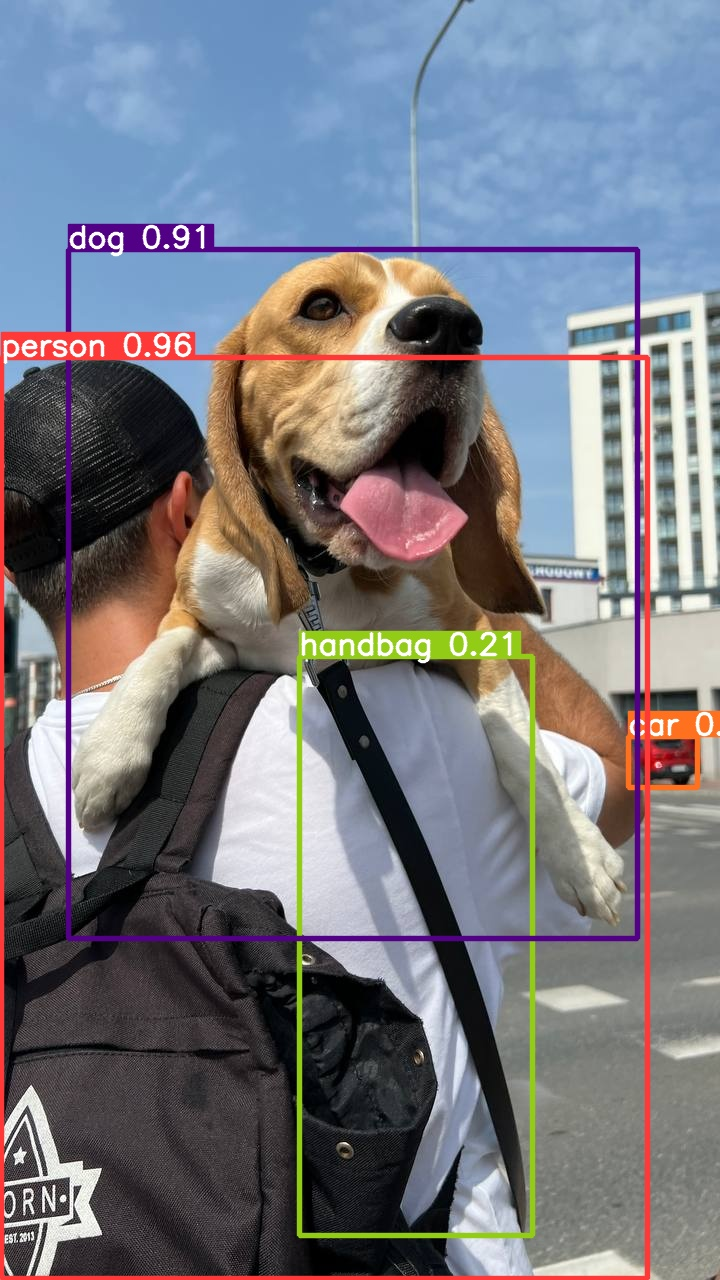

In [33]:
from IPython.display import Image

Image(filename=f"{HOME}/runs/detect/exp28/dog.jpeg", width=300)

In [40]:
DATA_PATH

'/home/jovyan/BA/detection/yolov9/Dataset'

# Test Image

In [53]:
!python train.py \
--batch 32 --epochs 1 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {DATA_PATH}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

train: weights=/home/jovyan/BA/detection/yolov9/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/home/jovyan/BA/detection/yolov9/Dataset/data.yaml, hyp=hyp.scratch-high.yaml, epochs=1, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLO 🚀 v0.1-76-g519346b Python-3.9.13 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5,

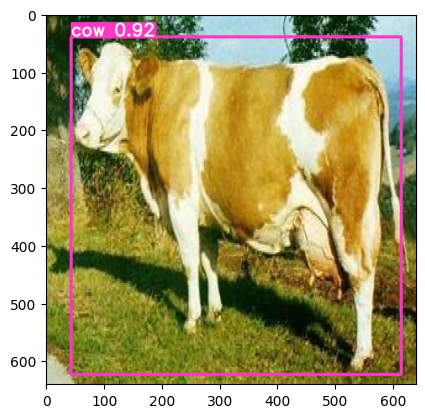

In [42]:
%matplotlib inline 
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

img_path = f'{CURRENT_DIR}/runs/detect/exp6/OIP-5rpbTamg1JP9gZjIpi27egHaEx_jpeg.rf.10bd7e471768f62c9494fcfd01e572a8.jpg'
img = Image.open(img_path)

plt.imshow(np.array(img))
plt.show()

# Train a model

In [9]:
!python train_dual.py --batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 --data /home/jovyan/detection/data-9/data.yaml --weights /home/jovyan/detection/yolov9-e.pt --device 0 --cfg /home/jovyan/detection/yolov9/models/detect/yolov9.yaml --hyp /home/jovyan/detection/yolov9/data/hyps/hyp.scratch-high.yaml

train_dual: weights=/home/jovyan/detection/yolov9-e.pt, cfg=/home/jovyan/detection/yolov9/models/detect/yolov9.yaml, data=/home/jovyan/detection/data-9/data.yaml, hyp=/home/jovyan/detection/yolov9/data/hyps/hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Traceback (most recent call last):
  File "/home/jovyan/BA/detection/yolov9/train_dual.py", line 644, in <module>
    main(opt)
  File "/home/jovyan/BA/detection/yolov9/train_dual.py", line 513, in main
 

# Val the model

from ultralytics import YOLO
print(CURRENT_DIR)
model = YOLO(f'{CURRENT_DIR}/runs/train/exp5/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()# no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

## Image

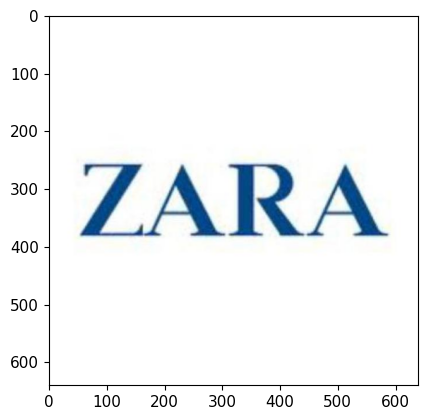

In [66]:
%matplotlib inline 
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

img_path = '/home/jovyan/detection/images/95_jpg.rf.8ab89367e12fa315e891d2e81008d8a4.jpg'
img = Image.open(img_path)

plt.imshow(np.array(img))
plt.show()

# Predict with the model

In [80]:
!python detect.py --weights '/home/jovyan/detection/yolov9/runs/train/exp5/weights/best.pt' --source '/home/jovyan/detection/images/95_jpg.rf.8ab89367e12fa315e891d2e81008d8a4.jpg' --device 0

detect: weights=['/home/jovyan/detection/yolov9/runs/train/exp5/weights/best.pt'], source=/home/jovyan/detection/images/95_jpg.rf.8ab89367e12fa315e891d2e81008d8a4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-76-g519346b Python-3.9.13 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)

Fusing layers... 
yolov9 summary: 580 layers, 60618340 parameters, 0 gradients, 264.6 GFLOPs
image 1/1 /home/jovyan/detection/images/95_jpg.rf.8ab89367e12fa315e891d2e81008d8a4.jpg: 640x640 1 ZARA, 20.0ms
Speed: 0.3ms pre-process, 20.0ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp23


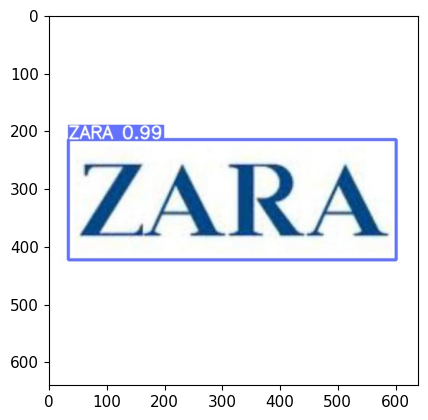

In [81]:
%matplotlib inline 
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

img_path = '/home/jovyan/detection/yolov9/runs/detect/exp23/95_jpg.rf.8ab89367e12fa315e891d2e81008d8a4.jpg'
img = Image.open(img_path)

plt.imshow(np.array(img))
plt.show()

results = model(img_path)  # predict on an image

In [79]:
import torch
print(torch._C._cuda_getDeviceCount())

1


In [ ]:
!pip list

In [82]:
!pip uninstall -y ultralytics torch torchvision ipywidgets

Found existing installation: ultralytics 8.1.38
Uninstalling ultralytics-8.1.38:
  Successfully uninstalled ultralytics-8.1.38
Found existing installation: torch 2.0.1+cu117
Uninstalling torch-2.0.1+cu117:
  Successfully uninstalled torch-2.0.1+cu117
Found existing installation: torchvision 0.15.2+cu117
Uninstalling torchvision-0.15.2+cu117:
  Successfully uninstalled torchvision-0.15.2+cu117
Found existing installation: ipywidgets 8.0.0
Uninstalling ipywidgets-8.0.0:
  Successfully uninstalled ipywidgets-8.0.0
